In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

## Hypothesis: singleton density is depleted by negative selection 

Negative selection acts in two ways: 

1. it turns doubleton sites into singleton sites, tending to increase the singleton count
2. it turns singleton sites into monomorphic sites, tending to decrease the singleton count 

Current studies focus on point (2), correctly inferring that monomorphic sites must increase in number, or, equivalently, polymorphic sites (singleton, doubleton, tripleton, etc) deplete in response to negative selection. 

We went one step further, and asked for the expected effect on singleton count too. 
Since singleton counts are observed to outnumber doubleton sites in typical allele frequency spectra, 
we reasoned that outflux from the singleton category would exceed its influx, leasing to a net decrease in singleton count. In our model, this corresponds to K_bar < 0. 

## z-scores for SNV density and singleton density, and disease-associated SNP counts, for noncoding trustworthy windows

Chen et al paper is at: 
https://github.com/quinlan-lab/constraint-tools/tree/main/literature/germline/chen%20et%20al%202022

I used the following script to compute the z-scores that are "common" to Chen et al and McHale et al: 

```
experiments/germline-model/chen-et-al-2022/compute-overlapping-zscores.sh
```

I used the following script to compute the number of GWAS-catalog SNPs that overlap each Chen et al window:

```
experiments/germline-model/chen-et-al-2022/add-snp-counts.sh
```


In [2]:
import pandas as pd 

def get_chen_mchale_snps():
    CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'
    filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.snps.bed'
    df = pd.read_csv(filename, sep='\t')
    return df

chen_mchale_zscores_snps = get_chen_mchale_snps()

chen_mchale_zscores_snps['mchale_K_bar'] = pd.to_numeric(chen_mchale_zscores_snps['mchale_K_bar'], errors='coerce')
chen_mchale_zscores_snps = chen_mchale_zscores_snps.dropna()
chen_mchale_zscores_snps.describe()

,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,overlap_bps,chen_snp_count
count,2.576570e+05,2.576570e+05,257657.000000,2.576570e+05,2.576570e+05,2.576570e+05,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000
mean,8.211134e+07,8.211234e+07,-0.626094,8.211133e+07,8.211233e+07,8.211183e+07,-0.123734,200.369856,0.014211,106.131151,200.362257,950.818324,0.063705
std,5.472855e+07,5.472855e+07,2.083320,5.472855e+07,5.472855e+07,5.472855e+07,2.210617,30.452046,0.982519,16.225943,30.449610,28.926395,0.271385
min,5.220000e+05,5.230000e+05,-9.994907,5.220890e+05,5.230900e+05,5.225890e+05,-9.121771,128.000000,-4.776766,53.000000,128.000000,901.000000,0.000000
25%,3.723900e+07,3.724000e+07,-1.765699,3.723909e+07,3.724009e+07,3.723959e+07,-1.546801,181.000000,-0.639530,95.000000,181.000000,926.000000,0.000000
50%,7.400700e+07,7.400800e+07,-0.487689,7.400709e+07,7.400809e+07,7.400759e+07,-0.447569,196.000000,0.028681,104.000000,196.000000,951.000000,0.000000
75%,1.163670e+08,1.163680e+08,0.696284,1.163669e+08,1.163679e+08,1.163674e+08,0.852049,214.000000,0.687698,115.000000,214.000000,976.000000,0.000000
max,2.483380e+08,2.483390e+08,9.924837,2.483380e+08,2.483390e+08,2.483385e+08,18.372572,431.000000,4.560088,234.000000,431.000000,1000.000000,8.000000


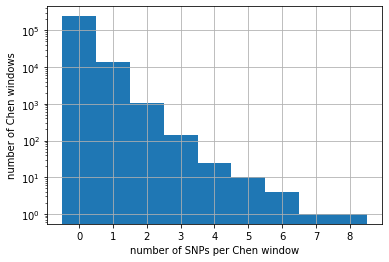

In [3]:
import numpy as np 

axis = chen_mchale_zscores_snps['chen_snp_count'].hist(bins=np.arange(-0.5, 9.5, 1))
axis.set_yscale('log')
axis.set_xlabel('number of SNPs per Chen window')
axis.set_ylabel('number of Chen windows')
_ = axis.set_xticks(np.arange(0, 9, step=1))

In [4]:
chen_mchale_zscores_snps['chen_at_least_one_snp'] = chen_mchale_zscores_snps['chen_snp_count'] > 0
chen_mchale_zscores_snps

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,overlap_bps,chen_snp_count,chen_at_least_one_snp
0,chr1,1488000,1489000,-7.408229,1487914,1488915,1488414,4.747864,296,-0.170831,146,296,915,0,False
1,chr1,1493000,1494000,-4.474465,1492940,1493941,1493440,4.367401,264,-0.159818,132,264,941,0,False
2,chr1,1494000,1495000,-8.346688,1493941,1494942,1494441,3.720978,319,-0.427748,152,319,942,0,False
3,chr1,1528000,1529000,-6.760843,1527996,1528997,1528496,3.033436,301,-0.721886,141,301,997,0,False
4,chr1,1547000,1548000,-4.818747,1546920,1547921,1547420,0.495223,263,-1.322700,119,263,921,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257883,chr9,137507000,137508000,0.730697,137507084,137508085,137507584,-1.163353,225,-1.161295,107,225,916,0,False
257884,chr9,137598000,137599000,-1.792983,137597929,137598930,137598429,0.506926,237,-1.071359,112,237,930,0,False
257885,chr9,137599000,137600000,-2.525948,137598930,137599931,137599430,0.467112,233,-1.703156,105,233,931,1,True
257886,chr9,137620000,137621000,-3.753054,137620068,137621069,137620568,1.028901,229,0.072424,120,229,932,0,False


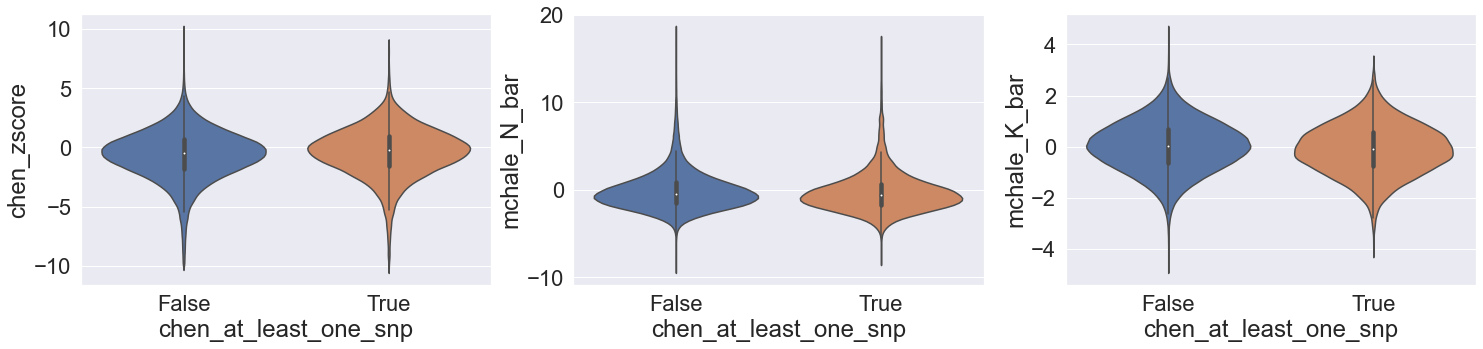

In [5]:
import seaborn as sns
sns.set(font_scale = 2)

import matplotlib.pyplot as plt 
fig, axs = plt.subplots(1, 3, figsize=(25,5))

for i, y in enumerate(['chen_zscore', 'mchale_N_bar', 'mchale_K_bar']):
    sns.violinplot(
        data=chen_mchale_zscores_snps, 
        y=y, 
        x="chen_at_least_one_snp",
        ax=axs[i]
    )

In [6]:
def compute_bins(number_bins): 
    z_min = -5
    z_max = 5
    bin_width = (z_max - z_min)/number_bins
    bins = np.arange(z_min, z_max+0.5*bin_width, bin_width)
    return bins
    
def aggregate(grouped_windows, x, y, z, aggregation_function): 
    aggregated = grouped_windows.agg({z["column"]: [aggregation_function]})
    aggregated.columns = [f'{z["column"]}_{aggregation_function}']
    aggregated = aggregated.reset_index()
    
    # pivot the data into a 2d array 
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
    aggregated = aggregated.pivot(index=f'{y["column"]}_bin', columns=f'{x["column"]}_bin', values=f'{z["column"]}_{aggregation_function}')
    
    return aggregated
    
def plot_heat_map(df, x, y, z, count_threshold, ax, heat_map_type): 
    # https://pandas.pydata.org/docs/reference/api/pandas.cut.html
    df[f'{x["column"]}_bin'] = pd.cut(df[x['column']], bins=compute_bins(x['number_of_bins']))
    df[f'{y["column"]}_bin'] = pd.cut(df[y['column']], bins=compute_bins(y['number_of_bins']))

    grouped_windows = df.groupby([f'{x["column"]}_bin', f'{y["column"]}_bin'])
    
    sample_mean = aggregate(grouped_windows, x, y, z, 'mean')
    sample_std = aggregate(grouped_windows, x, y, z, 'std')
    
    sample_size = pd.DataFrame(grouped_windows.size())
    sample_size.columns = ['counts']
    sample_size = sample_size.reset_index()

    # pivot the data into a 2d array 
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
    sample_size = sample_size.pivot(index=f'{y["column"]}_bin', columns=f'{x["column"]}_bin', values='counts')
    
    # https://en.wikipedia.org/wiki/Standard_error
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.divide.html
    standard_error_of_mean = sample_std / np.sqrt(sample_size)
    
    mask = sample_size < count_threshold

    if heat_map_type == 'snp_enrichment':
        heat_map = sample_mean 
        heat_map_colorbar_label = z['snp_enrichment_label']
    elif heat_map_type == 'snp_enrichment_fractional_error': 
        heat_map = standard_error_of_mean/sample_mean
        heat_map_colorbar_label = z['fractional_error_label']
    else:
        raise ValueError
        
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    sns.heatmap(
        heat_map, 
        cmap = 'BrBG', 
        center = None, 
        annot = True, 
        fmt = '.3f', 
        linewidths = .5, 
        cbar_kws = {'label': heat_map_colorbar_label},
        ax = ax,
        mask = mask
    )
    ax.invert_yaxis()
        
def plot_heat_maps(x_number_of_bins, y_number_of_bins, y_column):
    # sns.set(rc = {'figure.figsize': (10, 8)})
    sns.set(font_scale = 1)

    with sns.axes_style("white"):        
        fig, axs = plt.subplots(1, 2, figsize=(25,5))
        for i, heat_map_type in enumerate(['snp_enrichment', 'snp_enrichment_fractional_error']):
            plot_heat_map(
                df = chen_mchale_zscores_snps,
                x = {
                    'column': 'chen_zscore',
                    'number_of_bins': x_number_of_bins
                },
                y = { 
                    'column': y_column,
                    'number_of_bins': y_number_of_bins
                },
                z = {
                    'column': 'chen_at_least_one_snp',
                    'snp_enrichment_label': 'fraction of Chen windows that have at least one SNP',
                    'fractional_error_label': 'fractional error of SNP enrichment'
                },
                count_threshold = 2e3,
                ax = axs[i],
                heat_map_type = heat_map_type,
            )
        


## Chen's z-score predicts SNP enrichment better than McHale's N_bar (c.f. Fig 3a of Chen et al 2022)

This is expected since Chen's z-score uses something very close to McHale's N_bar, and also other features (recombination rate, nucleosome density, methylation level, etc). 

Note also the correlation between the z-scores, as demonstrated in 

```
experiments/germline-model/chen-et-al-2022/Fig_1a.ipynb 
```

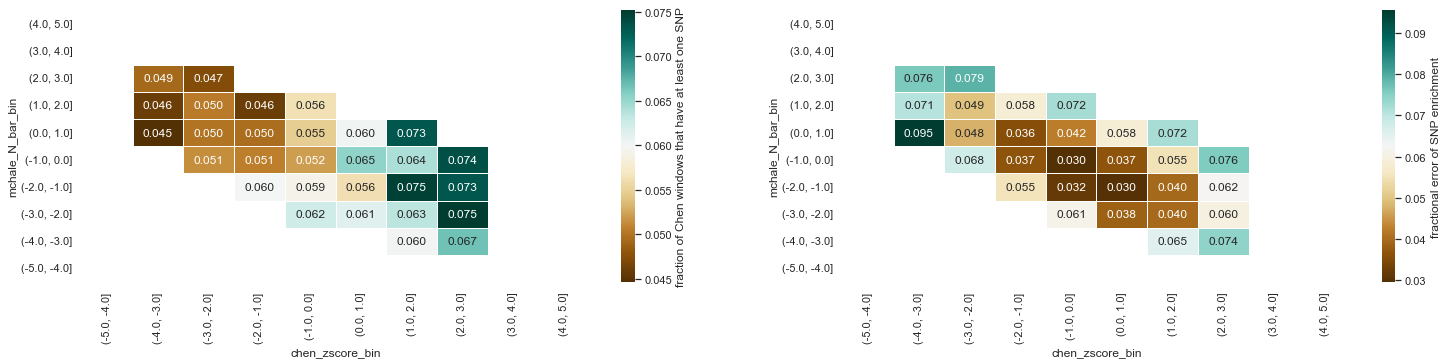

In [7]:
plot_heat_maps(
    x_number_of_bins=10, 
    y_number_of_bins=10,
    y_column='mchale_N_bar'
)

## McHale's K_bar further enriches for disease-associated SNPs, over what Chen's z-score can achieve

Note the absence of correlation between mchale_K_bar and chen_zscore, as demonstrated in 

```
experiments/germline-model/chen-et-al-2022/Fig_1a.ipynb
```


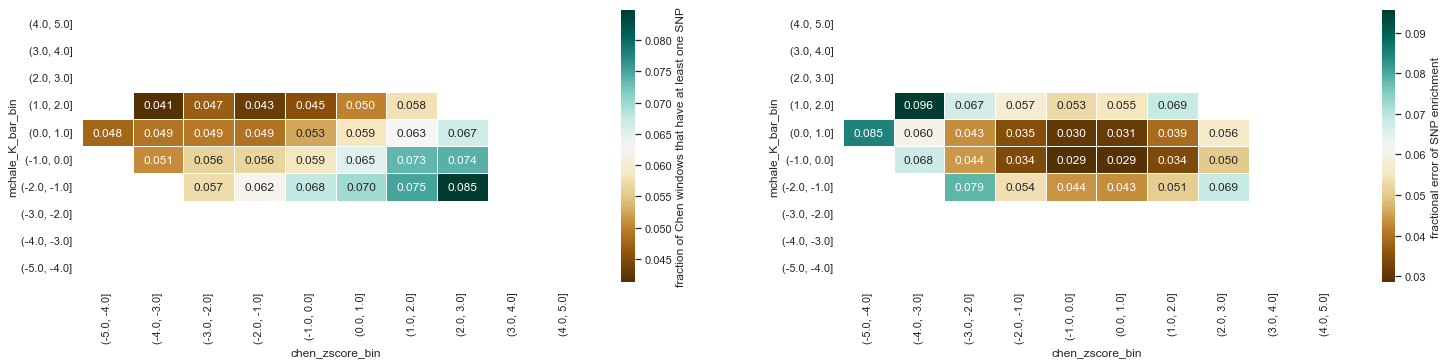

In [8]:
plot_heat_maps(
    x_number_of_bins=10, 
    y_number_of_bins=10,
    y_column='mchale_K_bar'
)